In [39]:
import torch as t
import torch.nn as nn
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

import random
import matplotlib.pyplot as plt

In [30]:
train_data = datasets.CIFAR10(
                            train=True,
                            root="data",
                            download=True,
                            transform = ToTensor(),
                            target_transform=None

)
test_data = datasets.CIFAR10(
                            train=False,
                            root="data",
                            download=True,
                            transform = ToTensor(),
                            target_transform=None
)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
BATCH_SIZE = 32
train_dataloader = DataLoader(dataset = train_data,
                              shuffle=False,
                              batch_size=BATCH_SIZE
                            )
test_dataloader = DataLoader(dataset=test_data,
                             shuffle=True,
                             batch_size=BATCH_SIZE)



In [64]:
class_names = train_data.classes

class_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [ ]:
image, target = next(iter(test_dataloader))



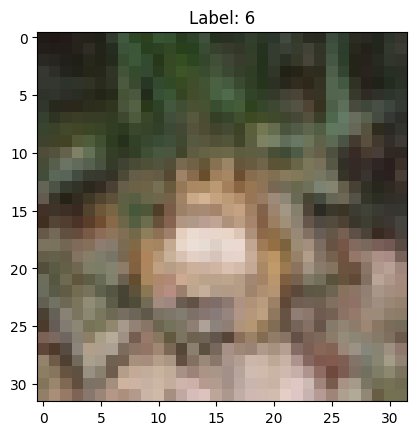

In [51]:
plt.imshow(image[random.randint(1,32)].permute(1, 2, 0))  # Convert image format for plotting
plt.title(f"Label: {target[0]}")
plt.show()

In [59]:
print(image[0].shape)
flatten = nn.Flatten()


x = flatten(image[0])
print(x.shape)

torch.Size([3, 32, 32])
torch.Size([3, 1024])


In [90]:
class CNNeq(nn.Module):
  def __init__ (self,IN:int,HID:int,OUT:int):
    super().__init__()
    self.conv1 = nn.Sequential(
                    nn.Conv2d(IN,HID,kernel_size=3,padding=1,stride=1),
                    nn.ReLU(),
                    nn.Conv2d(HID,HID,kernel_size=3,padding=1,stride=1),
                    nn.ReLU(),
                    nn.MaxPool2d(kernel_size=2)
    )
    self.conv2 = nn.Sequential(
                    nn.Conv2d(HID,HID,kernel_size=3,padding=1,stride=1),
                    nn.ReLU(),
                    nn.Conv2d(HID,HID,kernel_size=3,padding=1,stride=1),
                    nn.ReLU(),
                    nn.MaxPool2d(kernel_size=2)
    )
    self.conv3 = nn.Sequential(
                    nn.Conv2d(HID,HID,kernel_size=3,padding=1,stride=1),
                    nn.ReLU(),
                    nn.Conv2d(HID,HID,kernel_size=3,padding=1,stride=1),
                    nn.ReLU(),
                    nn.MaxPool2d(kernel_size=2)
    )

    self.output = nn.Sequential(
            nn.Flatten(),
            nn.Linear(HID * 4 * 4, HID),
            nn.ReLU(),
            nn.Linear(HID, OUT),
        )
  def forward(self,x:t.Tensor)->t.Tensor:
    out = self.conv1(x)
    out = self.conv2(out)
    out = self.conv3(out)
    out =  self.output(out)
    return out



In [91]:
model = CNNeq(IN=3,HID=100,OUT=len(class_names))

In [92]:
loss_fn = nn.CrossEntropyLoss()
optimizer = t.optim.SGD(model.parameters(),lr=0.001)

In [ ]:
from tqdm.auto import tqdm
EPOCHS = 2

for epoch in tqdm(range(EPOCHS)):
  print(f"EPOCH:{epoch}\n=====")
  train_loss = 0
  for batch, (x,y) in enumerate(train_dataloader):
    model.train()
    y_pred = model(x)
    loss = loss_fn(y_pred,y)
    train_loss += loss

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch % 5 == 0:
      print(f"Current Batch:{batch*len(x)}/{len(train_dataloader.dataset)}")


  model.eval()
  test_loss = 0
  with t.inference_mode():
        for x_test, y_test in test_dataloader:
            x_test, y_test = x_test  # Move data to GPU
            test_pred = model(x_test)
            test_loss += loss_fn(test_pred, y_test).item()  # Use .item() to accumulate scalar loss values
  print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}")



  0%|          | 0/2 [00:00<?, ?it/s]

EPOCH:0
=====
Current Batch:0/50000
Current Batch:160/50000
Current Batch:320/50000
Current Batch:480/50000
Current Batch:640/50000
Current Batch:800/50000
Current Batch:960/50000
Current Batch:1120/50000
Current Batch:1280/50000
Current Batch:1440/50000
Current Batch:1600/50000
Current Batch:1760/50000
Current Batch:1920/50000
Current Batch:2080/50000
Current Batch:2240/50000
Current Batch:2400/50000
Current Batch:2560/50000
Current Batch:2720/50000
Current Batch:2880/50000
Current Batch:3040/50000
Current Batch:3200/50000
Current Batch:3360/50000
